In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity



In [7]:
my_data_set = pd.read_csv("./data_bundle.csv")

In [8]:
my_data_set

,ACTIVATION_DATE,SUBSCRIPTION_ID,BUNDLE_NAME,REVENUE,GENDER,PROVINCE
0,10/14/2023,19942400,Monthly 20GB for 999AFN,999,Male,KABUL
1,10/24/2023,413420637,Monthly 20GB for 999AFN,999,Male,GHOR
2,10/30/2023,447529411,Monthly 20GB for 999AFN,999,Male,BALKH
3,10/27/2023,515256392,Monthly 20GB for 999AFN,999,Male,KABUL
4,10/27/2023,609716162,Monthly 20GB for 999AFN,999,Male,KABUL
5,10/24/2023,712096945,Monthly 6GB for 499AFN,549,Male,NANGARHAR
6,10/12/2023,113132445,Monthly 6GB for 499AFN,549,Male,BAGHLAN
7,10/15/2023,866501191,Monthly 6GB for 499AFN,549,Female,KABUL
8,10/30/2023,413420637,Monthly 6GB for 499AFN,549,Male,KABUL
9,10/24/2023,897691801,Monthly 6GB for 499AFN,0,Male,HELMAND


In [9]:
# Basic statistics summary
summary = my_data_set.describe()
summary

,SUBSCRIPTION_ID,REVENUE
count,2.100000e+01,21.000000
mean,5.503145e+08,489.571429
std,2.546980e+08,353.633648
min,1.994240e+07,0.000000
25%,4.134206e+08,149.000000
50%,5.512311e+08,549.000000
75%,7.120969e+08,549.000000
max,9.093246e+08,999.000000


In [10]:
print(my_data_set.dtypes)


ACTIVATION_DATE    object
SUBSCRIPTION_ID     int64
BUNDLE_NAME        object
REVENUE             int64
GENDER             object
PROVINCE           object
dtype: object


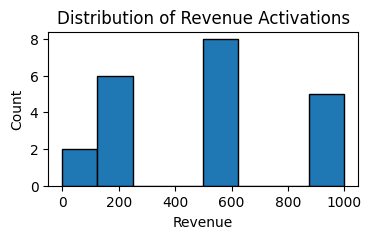

In [11]:
# Histogram of revenue activations
plt.figure(figsize=(4, 2))
plt.hist(my_data_set['REVENUE'], bins=8, edgecolor='k')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue Activations')
plt.show()


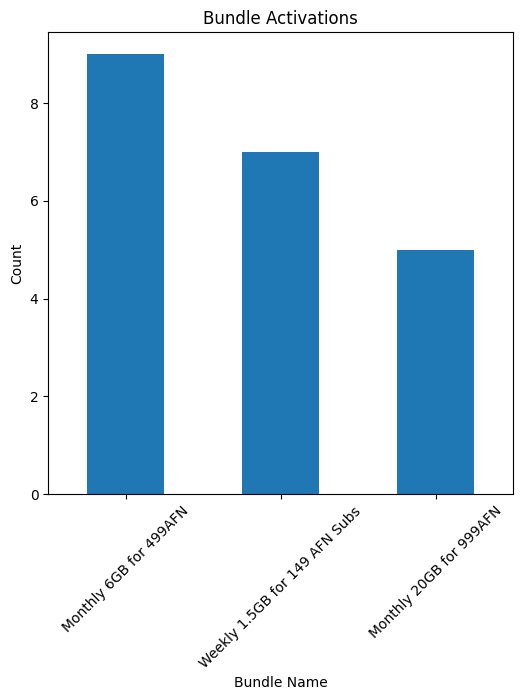

In [12]:
# Bar plot of bundle activations
bundle_counts = my_data_set['BUNDLE_NAME'].value_counts()
plt.figure(figsize=(6, 6))
bundle_counts.plot(kind='bar')
plt.xlabel('Bundle Name')
plt.ylabel('Count')
plt.title('Bundle Activations')
plt.xticks(rotation=45)
plt.show()

# User Interactive Matrix

In [13]:
# Identify the user, item, and activation columns
user_column = 'SUBSCRIPTION_ID'
item_column = 'BUNDLE_NAME'
activation_column = 'REVENUE'

# Create a binary interaction column (1 for activation, 0 for no activation)
my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)



In [14]:
my_data_set

,ACTIVATION_DATE,SUBSCRIPTION_ID,BUNDLE_NAME,REVENUE,GENDER,PROVINCE,Interaction
0,10/14/2023,19942400,Monthly 20GB for 999AFN,999,Male,KABUL,1
1,10/24/2023,413420637,Monthly 20GB for 999AFN,999,Male,GHOR,1
2,10/30/2023,447529411,Monthly 20GB for 999AFN,999,Male,BALKH,1
3,10/27/2023,515256392,Monthly 20GB for 999AFN,999,Male,KABUL,1
4,10/27/2023,609716162,Monthly 20GB for 999AFN,999,Male,KABUL,1
5,10/24/2023,712096945,Monthly 6GB for 499AFN,549,Male,NANGARHAR,1
6,10/12/2023,113132445,Monthly 6GB for 499AFN,549,Male,BAGHLAN,1
7,10/15/2023,866501191,Monthly 6GB for 499AFN,549,Female,KABUL,1
8,10/30/2023,413420637,Monthly 6GB for 499AFN,549,Male,KABUL,1
9,10/24/2023,897691801,Monthly 6GB for 499AFN,0,Male,HELMAND,0


In [15]:
# Create the User-Item Interaction Matrix
user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

In [16]:
user_item_matrix

BUNDLE_NAME,Monthly 20GB for 999AFN,Monthly 6GB for 499AFN,Weekly 1.5GB for 149 AFN Subs
SUBSCRIPTION_ID,,,
19942400,1.0,0.0,0.0
113132445,0.0,1.0,0.0
242243425,0.0,0.0,1.0
289227863,0.0,0.0,1.0
413420637,1.0,1.0,0.0
447529411,1.0,1.0,0.0
515256392,1.0,0.0,1.0
551231134,0.0,1.0,0.0
609716162,1.0,1.0,0.0


In [17]:
# Convert the pivot table to a NumPy array
user_item_matrix_np = user_item_matrix.to_numpy()

In [18]:
user_item_matrix_np

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 1., 1.],
       [0., 0., 1.],
       [0., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [19]:
# Calculate the cosine similarity between all pairs of users
user_similarity_matrix = cosine_similarity(user_item_matrix_np)

In [20]:
user_similarity_matrix

array([[1.        , 0.        , 0.        , 0.        , 0.70710678,
        0.70710678, 0.70710678, 0.        , 0.70710678, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.70710678,
        0.70710678, 0.        , 1.        , 0.70710678, 0.70710678,
        0.        , 0.70710678, 0.        , 1.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.70710678,
        1.        , 0.70710678, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.70710678,
        1.        , 0.70710678, 0.        , 0.        ],
       [0.70710678, 0.70710678, 0.        , 0.        , 1.        ,
        1.        , 0.5       , 0.70710678, 1.        , 0.5       ,
        0.        , 0.5       , 0.        , 0.70710678],
       [0.70710678, 0.70710678, 0. 

In [21]:
# Convert the similarity matrix to a DataFrame for better visualization
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [22]:
user_similarity_df


SUBSCRIPTION_ID,19942400,113132445,242243425,289227863,413420637,447529411,515256392,551231134,609716162,712096945,853537687,866501191,897691801,909324638
SUBSCRIPTION_ID,,,,,,,,,,,,,,
19942400,1.000000,0.000000,0.000000,0.000000,0.707107,0.707107,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.0,0.000000
113132445,0.000000,1.000000,0.000000,0.000000,0.707107,0.707107,0.000000,1.000000,0.707107,0.707107,0.000000,0.707107,0.0,1.000000
242243425,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,1.000000,0.707107,0.0,0.000000
289227863,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,1.000000,0.707107,0.0,0.000000
413420637,0.707107,0.707107,0.000000,0.000000,1.000000,1.000000,0.500000,0.707107,1.000000,0.500000,0.000000,0.500000,0.0,0.707107
447529411,0.707107,0.707107,0.000000,0.000000,1.000000,1.000000,0.500000,0.707107,1.000000,0.500000,0.000000,0.500000,0.0,0.707107
515256392,0.707107,0.000000,0.707107,0.707107,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000,0.707107,0.500000,0.0,0.000000
551231134,0.000000,1.000000,0.000000,0.000000,0.707107,0.707107,0.000000,1.000000,0.707107,0.707107,0.000000,0.707107,0.0,1.000000
609716162,0.707107,0.707107,0.000000,0.000000,1.000000,1.000000,0.500000,0.707107,1.000000,0.500000,0.000000,0.500000,0.0,0.707107


In [23]:

user_item_matrix

BUNDLE_NAME,Monthly 20GB for 999AFN,Monthly 6GB for 499AFN,Weekly 1.5GB for 149 AFN Subs
SUBSCRIPTION_ID,,,
19942400,1.0,0.0,0.0
113132445,0.0,1.0,0.0
242243425,0.0,0.0,1.0
289227863,0.0,0.0,1.0
413420637,1.0,1.0,0.0
447529411,1.0,1.0,0.0
515256392,1.0,0.0,1.0
551231134,0.0,1.0,0.0
609716162,1.0,1.0,0.0


In [24]:
# Define a function to get users who need to activate certain bundles based on their similar users
def get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_name, N=3, threshold=0.7):
    user_recommendations = {}
    
    for target_user in user_item_matrix.index:
        print('target User: ',target_user)
        target_user_data = user_item_matrix.loc[target_user]
        print('target user data : ' , target_user_data)
        
    
        '''
        # Check if the target user has already activated the bundle
        if target_user_data[bundle_name] == 0:
            # Get the top N similar users who have activated the specified bundle
            similar_users = user_similarity_matrix[target_user].sort_values(ascending=False)
            top_similar_users = similar_users[(similar_users >= threshold) & (user_item_matrix.loc[similar_users.index, bundle_name] == 1)].head(N)
            
            # Store the recommendations
            user_recommendations[target_user] = top_similar_users.index.tolist()
    
    return user_recommendations
    '''

# Specify the bundle you want to recommend (e.g., 'Daily 1GB for 50 Afs Subscription')
bundle_to_recommend = 'Monthly 30GB 1399AFN'

# Get users who need to activate the specified bundle based on their similar users (e.g., top 5 similar users)
users_to_activate_bundle = get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_to_recommend, N=5)


target User:  19942400
target user data :  BUNDLE_NAME
Monthly 20GB for 999AFN          1.0
Monthly 6GB for 499AFN           0.0
Weekly 1.5GB for 149 AFN Subs    0.0
Name: 19942400, dtype: float64
target User:  113132445
target user data :  BUNDLE_NAME
Monthly 20GB for 999AFN          0.0
Monthly 6GB for 499AFN           1.0
Weekly 1.5GB for 149 AFN Subs    0.0
Name: 113132445, dtype: float64
target User:  242243425
target user data :  BUNDLE_NAME
Monthly 20GB for 999AFN          0.0
Monthly 6GB for 499AFN           0.0
Weekly 1.5GB for 149 AFN Subs    1.0
Name: 242243425, dtype: float64
target User:  289227863
target user data :  BUNDLE_NAME
Monthly 20GB for 999AFN          0.0
Monthly 6GB for 499AFN           0.0
Weekly 1.5GB for 149 AFN Subs    1.0
Name: 289227863, dtype: float64
target User:  413420637
target user data :  BUNDLE_NAME
Monthly 20GB for 999AFN          1.0
Monthly 6GB for 499AFN           1.0
Weekly 1.5GB for 149 AFN Subs    0.0
Name: 413420637, dtype: float64
target 

In [25]:
user_similarity_df.head(3)

SUBSCRIPTION_ID,19942400,113132445,242243425,289227863,413420637,447529411,515256392,551231134,609716162,712096945,853537687,866501191,897691801,909324638
SUBSCRIPTION_ID,,,,,,,,,,,,,,
19942400,1.0,0.0,0.0,0.0,0.707107,0.707107,0.707107,0.0,0.707107,0.000000,0.0,0.000000,0.0,0.0
113132445,0.0,1.0,0.0,0.0,0.707107,0.707107,0.000000,1.0,0.707107,0.707107,0.0,0.707107,0.0,1.0
242243425,0.0,0.0,1.0,1.0,0.000000,0.000000,0.707107,0.0,0.000000,0.707107,1.0,0.707107,0.0,0.0


In [26]:
## fucntion to find the recommendation

###### Define a function to get users who need to activate certain bundles based on their similar users
def get_users_to_activate_bundles(user_item_matrix, user_similarity_matrix, bundle_name, N=3, threshold=0.4):
    user_recommendations = {}
    for target_user in user_item_matrix.index:
        #print(target_user)
        target_user_data = user_item_matrix.loc[target_user]
        #print('target user data' , target_user_data)

    #Check if the target user has already activated the bundle
        if target_user_data[bundle_name] == 0:  
            # Here we get the similar users and at the same time droping the target user from the list 
            similar_users = user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
            #print('user simi' , similar_users)
            
            #Now we are ready to get the top users based on the N provided and at the same time checking if they activated the given bundle
            similar_user_activation = user_item_matrix.loc[similar_users.index, bundle_name] == 1 

            #print(type(similar_user_activation))

            #Now we only get those customers that have actualy activated the 
            true_subscriptions = similar_user_activation[similar_user_activation].index
            #print('Activation' , true_subscriptions)

        
            #And based on the condition of Threshold we have to get that customers that are realy close based on Cosine Similarity
            #top_similar_users = true_subscriptions[(similar_users >= threshold)].head(N)
            similar_users_with_true_activation = similar_users[true_subscriptions]
            #print('TRUE ' ,similar_users_with_true_activation) 

            top_similar_users = similar_users_with_true_activation[(similar_users_with_true_activation >= threshold)].head(N)

            #print('TOP ' , top_similar_users)

            # Store the recommendations
            user_recommendations[target_user] = top_similar_users.index.tolist() 
            #print('rec',user_recommendations)
    
    return user_recommendations



In [27]:
# Specify the bundle you want to recommend (e.g., 'Weekly 1.5GB for 149 AFN Subs')
bundle_to_recommend = 'Weekly 1.5GB for 149 AFN Subs'

# Get users who need to activate the specified bundle based on their similar users (e.g., top 3 similar users)
users_to_activate_bundle = get_users_to_activate_bundles(user_item_matrix, user_similarity_df, bundle_to_recommend, N=3)

# Getting only the Users list and then combine them with bundle_to_recommend
user_recommendations=list(users_to_activate_bundle.keys())
recommendation_final = pd.DataFrame({'subscription_id': user_recommendations, 'bundle_to_recommend': bundle_to_recommend})

recommendation_final



,subscription_id,bundle_to_recommend
0,19942400,Weekly 1.5GB for 149 AFN Subs
1,113132445,Weekly 1.5GB for 149 AFN Subs
2,413420637,Weekly 1.5GB for 149 AFN Subs
3,447529411,Weekly 1.5GB for 149 AFN Subs
4,551231134,Weekly 1.5GB for 149 AFN Subs
5,609716162,Weekly 1.5GB for 149 AFN Subs
6,897691801,Weekly 1.5GB for 149 AFN Subs
7,909324638,Weekly 1.5GB for 149 AFN Subs


In [28]:
import pandas as pd
import unittest


In [29]:
class TestGetUsersToActivateBundles(unittest.TestCase):

    def setUp(self):
        # Sample user_item_matrix
        data = {
            'SUBSCRIPTION_ID': [19942400, 289227863, 413420637, 447529411, 515256392, 609716162, 712096945,
                                242243425, 551231134, 113132445, 853537687, 866501191, 897691801, 909324638],
            'Monthly 20GB for 999AFN': [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            'Monthly 6GB for 499AFN': [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
            'Weekly 1.5GB for 149 AFN Subs': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
        }
        self.user_item_matrix = pd.DataFrame(data)
        
        # Sample user_similarity_matrix (you can customize this)
        data = {
            'SUBSCRIPTION_ID': [19942400, 289227863, 413420637, 447529411, 515256392, 609716162, 712096945,
                                242243425, 551231134, 113132445, 853537687, 866501191, 897691801, 909324638],
            'Similarity': [0.7, 0.5, 0.8, 0.6, 0.9, 0.75, 0.85, 0.65, 0.7, 0.7, 0.8, 0.9, 0.4, 0.6]
        }
        self.user_similarity_matrix = pd.DataFrame(data)


In [30]:
    def test_recommendations(self):
        bundle_to_recommend = 'Weekly 1.5GB for 149 AFN Subs'
        N = 3
        threshold = 0.4

        user_recommendations = get_users_to_activate_bundles(
            self.user_item_matrix,
            self.user_similarity_matrix,
            bundle_to_recommend,
            N=N,
            threshold=threshold
        )

        # Expected recommendations
        expected_recommendations = {
            19942400 : [515256392],
            413420637: [515256392, 712096945, 866501191],
            447529411: [515256392, 712096945, 866501191],
            609716162: [515256392, 712096945, 866501191],
            551231134: [712096945, 866501191],
            113132445: [712096945, 866501191],
            897691801: [],
            909324638: [712096945, 866501191]
        }

        self.assertEqual(user_recommendations, expected_recommendations)


In [31]:
import unittest

# Define your test class and test cases here

# Create a test suite and run it within the cell
test_suite = unittest.defaultTestLoader.loadTestsFromTestCase(TestGetUsersToActivateBundles)
result = unittest.TextTestRunner(verbosity=2).run(test_suite)

# Check the test results
if result.wasSuccessful():
    print("All tests passed successfully.")
else:
    print("Some tests failed.")



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


All tests passed successfully.


# As you can see above the Test has been success fully done

In [32]:
user_ids = list(users_to_activate_bundle.keys())
user_ids

[19942400,
 113132445,
 413420637,
 447529411,
 551231134,
 609716162,
 897691801,
 909324638]

In [33]:
user_ids = list(users_to_activate_bundle.keys())
user_ids

[19942400,
 113132445,
 413420637,
 447529411,
 551231134,
 609716162,
 897691801,
 909324638]

In [34]:
recommendation_final = pd.DataFrame({'subscription_id': user_ids, 'bundle_to_recommend': bundle_to_recommend})

recommendation_final

,subscription_id,bundle_to_recommend
0,19942400,Weekly 1.5GB for 149 AFN Subs
1,113132445,Weekly 1.5GB for 149 AFN Subs
2,413420637,Weekly 1.5GB for 149 AFN Subs
3,447529411,Weekly 1.5GB for 149 AFN Subs
4,551231134,Weekly 1.5GB for 149 AFN Subs
5,609716162,Weekly 1.5GB for 149 AFN Subs
6,897691801,Weekly 1.5GB for 149 AFN Subs
7,909324638,Weekly 1.5GB for 149 AFN Subs


# Now let's save our Model

In [35]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def get_users_to_activate_bundles(data, bundle_name, N=3, threshold=0.7):
    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Convert the pivot table to a NumPy array
    user_item_matrix_np = user_item_matrix.to_numpy()

    # Calculate the cosine similarity between all pairs of users
    user_similarity_matrix = cosine_similarity(user_item_matrix_np)

    # Convert the similarity matrix to a DataFrame for better visualization
    user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

    user_recommendations = {}
    for target_user in user_item_matrix.index:
        target_user_data = user_item_matrix.loc[target_user]

        if target_user_data[bundle_name] == 0:
            similar_users = user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
            similar_user_activation = user_item_matrix.loc[similar_users.index, bundle_name] == 1 
            true_subscriptions = similar_user_activation[similar_user_activation].index
            similar_users_with_true_activation = similar_users[true_subscriptions]
            top_similar_users = similar_users_with_true_activation[(similar_users_with_true_activation >= threshold)].head(N)
            user_recommendations[target_user] = top_similar_users.index.tolist()

    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final


In [36]:
#testing if my function works correctly or not
rec= get_users_to_activate_bundles("./data_bundle.csv","Weekly 1.5GB for 149 AFN Subs")
rec

,subscription_id,bundle_to_recommend
0,19942400,Weekly 1.5GB for 149 AFN Subs
1,113132445,Weekly 1.5GB for 149 AFN Subs
2,413420637,Weekly 1.5GB for 149 AFN Subs
3,447529411,Weekly 1.5GB for 149 AFN Subs
4,551231134,Weekly 1.5GB for 149 AFN Subs
5,609716162,Weekly 1.5GB for 149 AFN Subs
6,897691801,Weekly 1.5GB for 149 AFN Subs
7,909324638,Weekly 1.5GB for 149 AFN Subs


In [37]:
# now let's make a cloass of our model to use it out of the jupyter

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle

class RecommendationModel:
    def __init__(self):
        self.user_item_matrix = None
        self.user_similarity_df = None

    def load_data(self, file_path):
        # Load data from CSV file
        my_data_set = pd.read_csv(file_path)

        # Identify columns
        user_column = 'SUBSCRIPTION_ID'
        item_column = 'BUNDLE_NAME'
        activation_column = 'REVENUE'

        # Create a binary interaction column
        my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

        # Create the User-Item Interaction Matrix
        self.user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column,
                                                        fill_value=0)

        # Convert the pivot table to a NumPy array
        user_item_matrix_np = self.user_item_matrix.to_numpy()

        # Calculate cosine similarity between all pairs of users
        user_similarity_matrix = cosine_similarity(user_item_matrix_np)

        # Convert the similarity matrix to a DataFrame
        self.user_similarity_df = pd.DataFrame(user_similarity_matrix, index=self.user_item_matrix.index,
                                               columns=self.user_item_matrix.index)

    def save_model(self, model_path):
        # Save the model to a file
        with open(model_path, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load_model(model_path):
        # Load the model from a file
        with open(model_path, 'rb') as file:
            return pickle.load(file)

    def get_users_to_activate_bundles(self, bundle_name, N=3, threshold=0.7):
        user_recommendations = {}
        for target_user in self.user_item_matrix.index:
            target_user_data = self.user_item_matrix.loc[target_user]
            if target_user_data[bundle_name] == 0:
                similar_users = self.user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
                similar_user_activation = self.user_item_matrix.loc[similar_users.index, bundle_name] == 1
                true_subscriptions = similar_user_activation[similar_user_activation].index
                similar_users_with_true_activation = similar_users[true_subscriptions]
                top_similar_users = similar_users_with_true_activation[
                    (similar_users_with_true_activation >= threshold)].head(N)
                user_recommendations[target_user] = top_similar_users.index.tolist()

        recommendations = list(user_recommendations.keys())
        recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
        return recommendation_final


# Example usage:
# model = RecommendationModel()
# model.load_data("./data_bundle.csv")
# model.save_model("bundle_recommendation_model.pkl")


In [38]:
# Example usage:
model = RecommendationModel()
model.load_data("./data_bundle.csv")
model.save_model("bundle_recommendation_model.pkl")

# Wanna Talk With DataFrame?

In [39]:
import pandas as pd
import sketch

# Create a sample Pandas DataFrame
#df = pd.read_csv()
#print(df)
#df = pd.DataFrame(data)
#print(df)

# Use Sketch functionalities
my_data_set.sketch.ask("how many columns do you have and name it")


# Let's Compare my Model with SK-Learn NearestNeighbor ML model

In [42]:
# here we put the scenario in SKlearn 

import pandas as pd
from sklearn.neighbors import NearestNeighbors
import warnings
import time 

def get_users_to_activate_bundles_knn(data, bundle_name, N=3, threshold=0.4):
    start_time = time.time()

    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Suppress sklearn warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        # Fit the Nearest Neighbors model
        model = NearestNeighbors(metric='cosine', algorithm='brute')
        model.fit(user_item_matrix)

    user_recommendations = {}
    for target_user in user_item_matrix.index:
        target_user_data = user_item_matrix.loc[target_user]

        if target_user_data[bundle_name] == 0:
            target_user_data_array = target_user_data.to_numpy().reshape(1, -1)
            
            # Suppress sklearn warnings during prediction
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")

                distances, indices = model.kneighbors(target_user_data_array, n_neighbors=N+1)

            # Exclude the target user itself from the recommendations
            similar_users = user_item_matrix.index[indices.flatten()][1:]

            # Filter similar users based on the threshold
            similar_users_with_true_activation = similar_users[user_item_matrix.loc[similar_users, bundle_name] == 1]
            top_similar_users = similar_users_with_true_activation[:N]
            user_recommendations[target_user] = top_similar_users.tolist()
    # Calculate overall elapsed time
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Overall time taken: {elapsed_time} seconds")
            

    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final

In [43]:
get_users_to_activate_bundles_knn("./data_bundle - Copy.csv",'Monthly 6GB for 499AFN')

Overall time taken: 21.2240788936615 seconds


,subscription_id,bundle_to_recommend
0,396227.0,Monthly 6GB for 499AFN
1,998046.0,Monthly 6GB for 499AFN
2,1025739.0,Monthly 6GB for 499AFN
3,1300059.0,Monthly 6GB for 499AFN
4,1940368.0,Monthly 6GB for 499AFN
...,...,...
11170,945112741.0,Monthly 6GB for 499AFN
11171,945113076.0,Monthly 6GB for 499AFN
11172,945274818.0,Monthly 6GB for 499AFN
11173,946194450.0,Monthly 6GB for 499AFN


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def get_users_to_activate_bundles(data, bundle_name, N=3, threshold=0.4):
    start_time = time.time()

    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Convert the pivot table to a NumPy array
    user_item_matrix_np = user_item_matrix.to_numpy()

    # Calculate the cosine similarity between all pairs of users
    user_similarity_matrix = cosine_similarity(user_item_matrix_np)

    # Convert the similarity matrix to a DataFrame for better visualization
    user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

    user_recommendations = {}
    for target_user in user_item_matrix.index:
        target_user_data = user_item_matrix.loc[target_user]

        if target_user_data[bundle_name] == 0:
            similar_users = user_similarity_df[target_user].sort_values(ascending=False).drop(target_user)
            similar_user_activation = user_item_matrix.loc[similar_users.index, bundle_name] == 1 
            true_subscriptions = similar_user_activation[similar_user_activation].index
            similar_users_with_true_activation = similar_users[true_subscriptions]
            top_similar_users = similar_users_with_true_activation[(similar_users_with_true_activation >= threshold)].head(N)
            user_recommendations[target_user] = top_similar_users.index.tolist()
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Overall time taken: {elapsed_time} seconds")
    
    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final


In [ ]:
get_users_to_activate_bundles("./data_bundle - Copy.csv",'Monthly 6GB for 499AFN')

# Testing

In [ ]:
# not completed yet

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

def get_users_to_activate_bundles_knn(data, bundle_name, N=3, threshold=0.4):
    # Importing the dataset
    my_data_set = pd.read_csv(data)

    # Identify the user, item, and activation columns
    user_column = 'SUBSCRIPTION_ID'
    item_column = 'BUNDLE_NAME'
    activation_column = 'REVENUE'

    # Create a binary interaction column (1 for activation, 0 for no activation)
    my_data_set['Interaction'] = my_data_set[activation_column].apply(lambda x: 1 if x > 0 else 0)

    # Create the User-Item Interaction Matrix
    user_item_matrix = my_data_set.pivot_table(values='Interaction', index=user_column, columns=item_column, fill_value=0)

    # Split the dataset into training and testing sets (80:20)
    train_data, test_data = train_test_split(my_data_set, test_size=0.2, random_state=42)

    # Suppress sklearn warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Fit the Nearest Neighbors model on the training data
        model = NearestNeighbors(metric='cosine', algorithm='brute')
        model.fit(user_item_matrix.loc[train_data[user_column]])

    user_recommendations = {}
    for target_user in test_data[user_column].dropna().unique():
        target_user_data = user_item_matrix.loc[target_user]

        if pd.notna(target_user_data[bundle_name]) and target_user_data[bundle_name] == 0:
            target_user_data_array = target_user_data.to_numpy().reshape(1, -1)

            # Suppress sklearn warnings during prediction
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")

                distances, indices = model.kneighbors(target_user_data_array, n_neighbors=N + 1)

            # Exclude the target user itself from the recommendations
            similar_users = user_item_matrix.index[indices.flatten()][1:]

            # Filter similar users based on the threshold
            similar_users_with_true_activation = similar_users[user_item_matrix.loc[similar_users, bundle_name] == 1]
            top_similar_users = similar_users_with_true_activation[:N]
            user_recommendations[target_user] = top_similar_users.tolist()

    recommendations = list(user_recommendations.keys())
    recommendation_final = pd.DataFrame({'subscription_id': recommendations, 'bundle_to_recommend': bundle_name})
    return recommendation_final

# Call the function with your data
result = get_users_to_activate_bundles_knn("./data_bundle - Copy.csv", "Daily 200MB Data Bundle")

# Assuming 'your_ground_truth.csv' contains the actual activations for the test set
ground_truth = pd.read_csv('./truth.csv')

# Merge the recommendations with the ground truth on 'subscription_id'
merged_result = pd.merge(result, ground_truth, on='subscription_id', how='left')

# Fill NaN values with 0, as NaN means no activation in the ground truth
merged_result['actual_activation'] = merged_result['actual_activation'].fillna(0)

# Convert the 'bundle_to_recommend' and 'actual_activation' columns to binary (1 or 0)
merged_result['bundle_to_recommend'] = merged_result['bundle_to_recommend'].apply(lambda x: 1 if x == 'your_bundle' else 0)

# Calculate precision, recall, and f1 score
precision = precision_score(merged_result['actual_activation'], merged_result['bundle_to_recommend'])
recall = recall_score(merged_result['actual_activation'], merged_result['bundle_to_recommend'])
f1 = f1_score(merged_result['actual_activation'], merged_result['bundle_to_recommend'])

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


In [ ]:
# Call the function with your data
result = get_users_to_activate_bundles_knn("./data_bundle - Copy.csv","Daily 200MB Data Bundle")
result